In [1]:
import autoencoder.adversarial_cluster as aaec
import autoencoder.adversarial as aae
from matplotlib import pyplot as plt
%matplotlib inline

/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
esize = [(64,3), (128, 3)] #, (256,3)]
dsize = list(reversed(esize))

params =dict()

params['nclusters'] = 20
params['width'] = 28
params['height'] = 28
params['nchannels'] = 1
params['channels'] = [0]
params['nepochs'] = 20
params['batchsize'] = 256
params['learning_rate'] = 0.0005
params['restore'] = False
params['latent_size'] = 16
params['enc_sizes'] = esize 
params['dec_sizes'] = dsize
params['droprate'] = 0.85
params['stdev'] = 0.04
params['denoise'] = False
params['slam'] = 0

datadir = "/media/cjw/Data/MNIST/"


Using data from: /media/cjw/Data/MNIST/
Saving checkpoints to: /media/cjw/Data/cyto/Checkpoints/2018-09-12-11-01-37_idec_mnist/checkpoint-2018-09-12-11-01-37/autoencoder-16x
Encoder True
Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32) (?, 28, 28, 1)
isize:  7 28
dh0 (?, 28, 28, 1)
[<tf.Variable 'encoder/filter_00/kernel:0' shape=(3, 3, 1, 64) dtype=float32_ref>, <tf.Variable 'encoder/filter_00/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'encoder/filter_01/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>, <tf.Variable 'encoder/filter_01/bias:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'encoder/latent_space/kernel:0' shape=(6272, 16) dtype=float32_ref>, <tf.Variable 'encoder/latent_space/bias:0' shape=(16,) dtype=float32_ref>, <tf.Variable 'decoder/dense/kernel:0' shape=(16, 6272) dtype=float32_ref>, <tf.Variable 'decoder/dense/bias:0' shape=(6272,) dtype=float32_ref>, <tf.Variable 'decoder/conv2d_transpose/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>, 

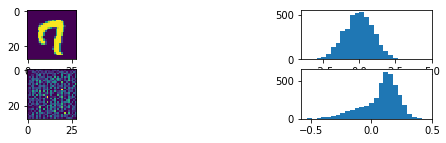

1000 1.1564217 1.0593407 9.784827
display


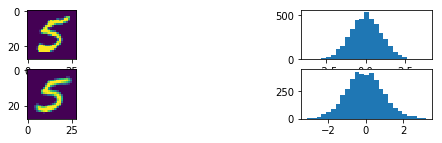

2000 1.1434128 1.0017476 9.739344
display


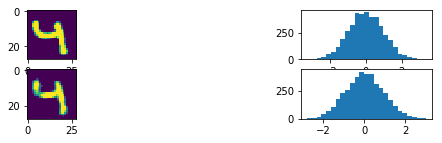

3000 1.1656318 0.9666564 9.096519
display


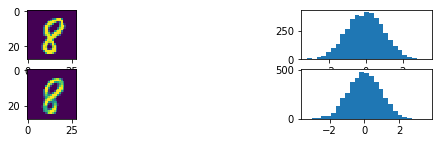

4000 1.1516801 1.0545139 8.779692
display


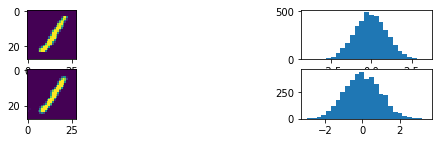

5000 1.155567 1.0895377 8.88018
display


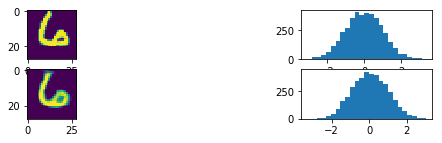

6000 1.1500858 1.0519761 8.45691
display


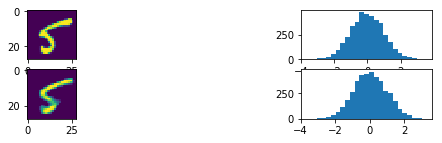

7000 1.1470718 1.0204488 9.033529
display


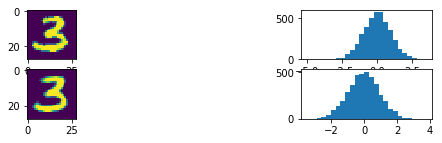

8000 1.1591806 1.0472429 9.298672
display


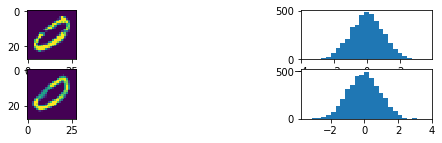

9000 1.1398677 1.1005584 9.298678
display


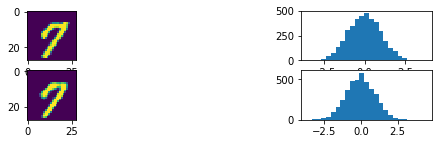

10000 1.148169 1.1347988 8.696298
display


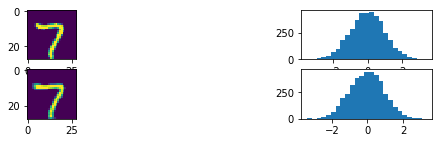

11000 1.1328509 1.0756063 9.013192
display


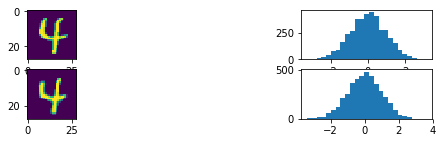

12000 1.1272175 1.147553 8.937021
display


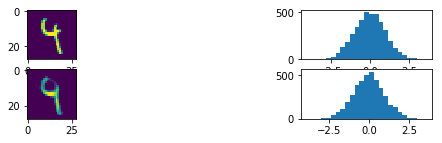

13000 1.1434953 1.0556357 9.034883
display


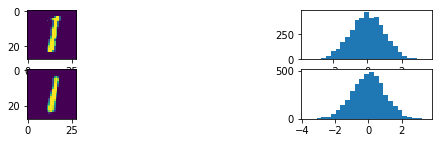

14000 1.1418468 1.0567014 8.410317
display


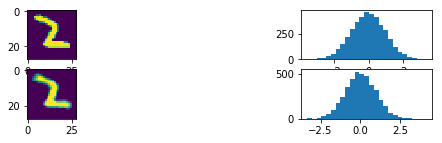

15000 1.1459222 1.0950267 8.465833
display


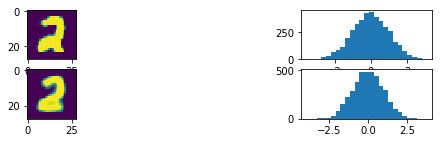

16000 1.1386075 1.0979253 8.98959
display


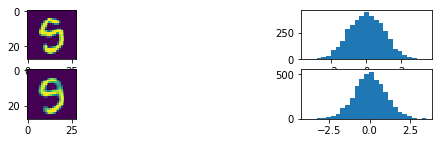

17000 1.144597 1.146995 8.701018
display


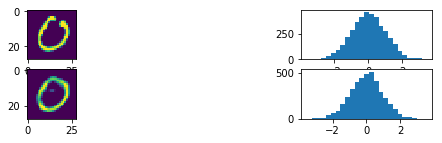

18000 1.1271596 1.1132501 8.579478
display


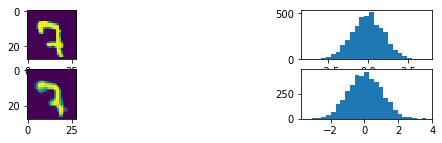

19000 1.1281543 1.1077065 8.896525
display


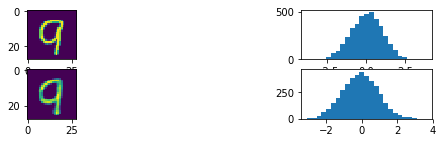

20000 1.1266305 1.1807353 8.73328
display


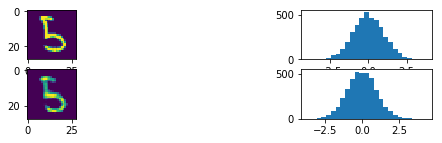

21000 1.135369 1.123304 9.204114
display


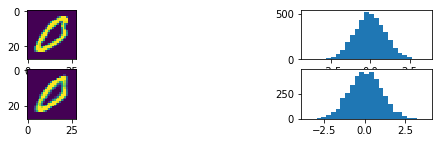

22000 1.114506 1.0888758 9.252262
display


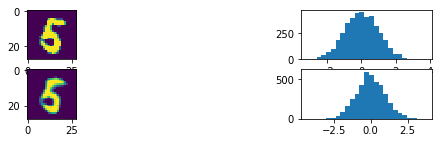

23000 1.113075 1.0869251 8.668033
display


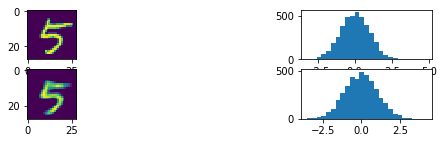

24000 1.1381266 1.087225 8.567077
display


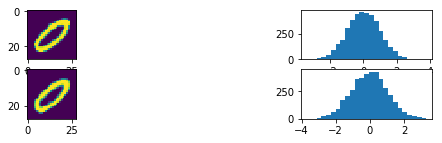

25000 1.1243911 1.1396588 8.875584
display


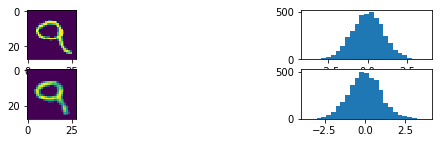

26000 1.1455858 1.091433 8.6752
display


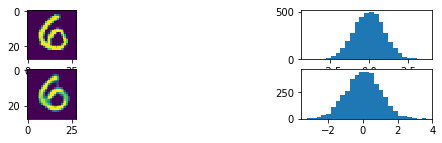

27000 1.1346142 1.1111898 9.60467
display


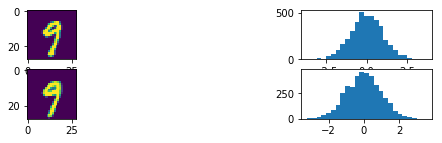

28000 1.1239464 1.1537337 8.700241
display


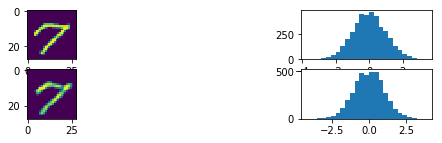

29000 1.1240203 1.0929174 8.843043
display


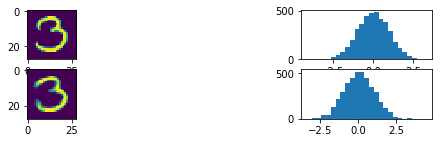

30000 1.1207631 1.0959904 8.959914
display


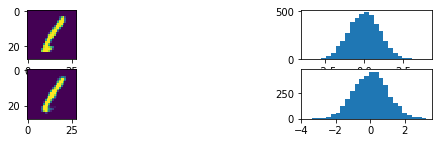

31000 1.1333857 1.137552 8.723561
display


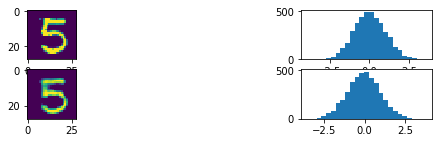

32000 1.1356049 1.1410687 8.9049835
display


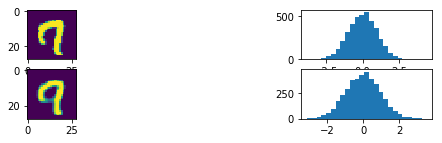

33000 1.1439252 1.0295433 8.893992
display


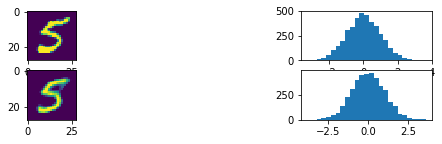

34000 1.1186886 1.1007248 8.746305
display


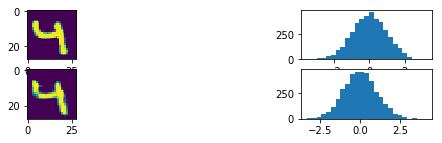

35000 1.1155417 1.1950076 9.05999
display


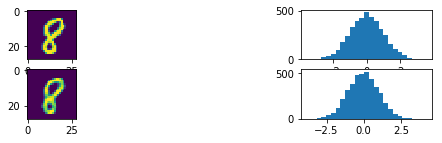

36000 1.1308675 1.1095207 9.170874
display


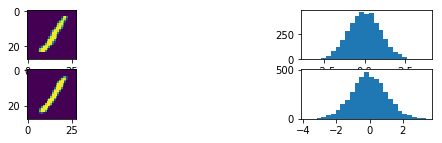

37000 1.1277592 1.048238 9.326091
display


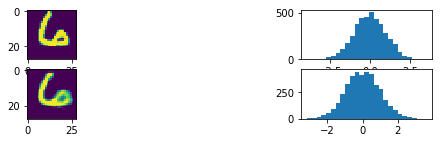

38000 1.1487706 1.0453843 8.93407
display


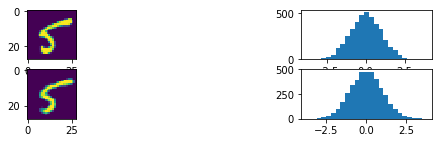

39000 1.1228287 1.1045976 8.85234
display


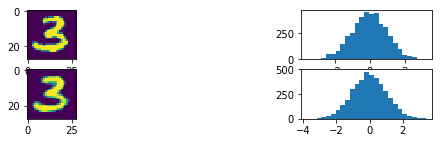

40000 1.1281087 1.0776489 8.878146
display


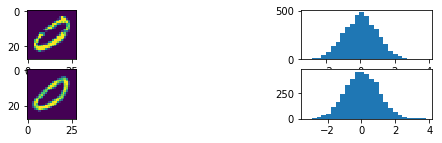

Done


In [3]:
t = aae.training(params, datadir, "idec_mnist")
t.train(gpu=True, display=True, display_int=1000, report_int=1000, niterations=40001)

#aae.train(1001, display=True, display_int=500, report_int=50,title="Adver_try3")

In [ ]:
# import autoencoder.cluster_layer as cl

In [ ]:
nc = t.params['nclusters']
m = t.params['latent_size']
Z = t.encoder.eval({t.images:t.get_batch(2400)}, session=t.sess)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=nc, n_init=20)
yp = kmeans.fit_predict(Z)
ypp = np.copy(yp)
c = cl.cluster_layer(nc, kmeans.cluster_centers_)
ca = c.apply(t.encoder)
#c.build((params['batchsize'], m))

(1, 256)


<IPython.core.display.Javascript object>


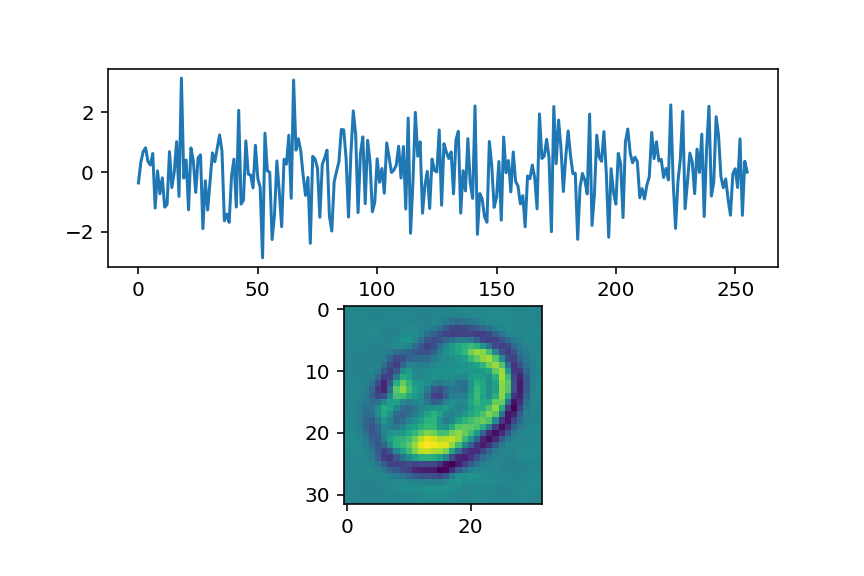

In [103]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
z = t.encoder.eval({t.images:t.get_batch(2400)}, session=t.sess)
r = t.decoder.eval({t.encoder:z}, session=t.sess)
print(g.shape)
plt.subplot(2,1,1)
plt.plot(z[0])
plt.subplot(2,1,2)
plt.imshow(r[0,:,:,0])

In [106]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16, n_init=20)
km = kmeans.fit_predict(z)
cx = kmeans.cluster_centers_




In [131]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10, learning_rate=80, metric='cosine').fit_transform(z)

(2400, 2)


<IPython.core.display.Javascript object>


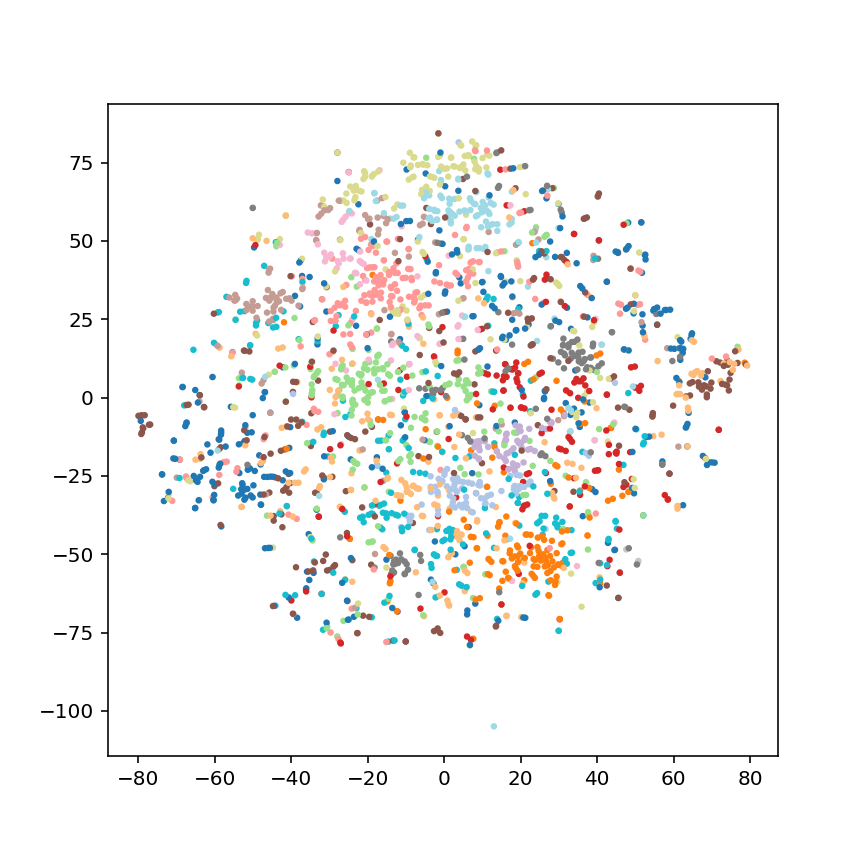

In [137]:
print(tsne.shape)
%matplotlib notebook
f = plt.figure(figsize=(6,6))
plt.scatter(tsne[:,0], tsne[:,1], 5, km, cmap='tab20_r')
plt.show()

In [159]:

t.saver.restore(t.sess,
                "/media/cjw/Data/cyto/Checkpoints/2018-09-05-10-58-21_idec_try_3/checkpoint-2018-09-05-10-58-21/autoencoder-256x-16000")

INFO:tensorflow:Restoring parameters from /media/cjw/Data/cyto/Checkpoints/2018-09-05-10-58-21_idec_try_3/checkpoint-2018-09-05-10-58-21/autoencoder-256x-16000


In [162]:
t.encoder

<tf.Tensor 'encoder/latent_space/BiasAdd:0' shape=(?, 256) dtype=float32>